<h2>1. Acquisition of elevation data </h2>

In [33]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

<h1>1. Data visualization </h1>

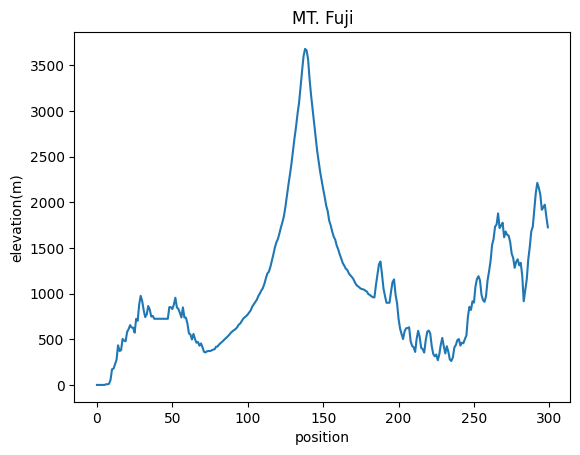

In [34]:
import matplotlib.pyplot as plt
plt.title("MT. Fuji")
plt.xlabel("position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,0],fuji[:,3])
plt.show()

<h2>2.  Create a function to calculate the gradient at a certain point </h2>

In [35]:
def calc_slope(point, fuji_data):
    elevation = fuji_data[point, 0]
    prev_elevation = fuji_data[point - 1, 0]
    position = fuji_data[point, 3]
    prev_position = fuji_data[point - 1, 3]

    change_in_elevation = elevation - prev_elevation
    change_in_position = position - prev_position

    if change_in_elevation == 0:
        slope = float('inf')  # Vertical slope
    else:
        slope = change_in_position / change_in_elevation
    return slope
print(calc_slope(0, fuji))
     

5.77190635451505


<h2>3.  Create a function to calculate the destination point </h2>

In [36]:
def calc_destination(current_point, alpha, slope):
    destination_point = current_point - alpha * slope
    destination_point = max(destination_point, 0)
    destination_point = round(destination_point)

    return destination_point

alpha = 0.4
current_point =6
slope = calc_slope(current_point, fuji)
print(calc_destination(current_point,alpha,slope))


3


<h2>4.  Create a function to go down the mountain </h2>

In [37]:
def descend_mountain(start_point, alpha):
    slope_1 = calc_slope(start_point, fuji)
    positions = [start_point]
    for counter in range(fuji.size):
        start_point = int(calc_destination(start_point,alpha,slope_1))
        if positions[-1] == start_point:
            break
        else:
            positions.append(start_point)
    return positions


start_point = 136  
alpha = 0.2
descent_path = descend_mountain(start_point, 0.2,)
print("Descent Path:", descent_path)

Descent Path: [136, 102, 68, 34, 0]


<h2>5. Visualization of the descent process </h2>

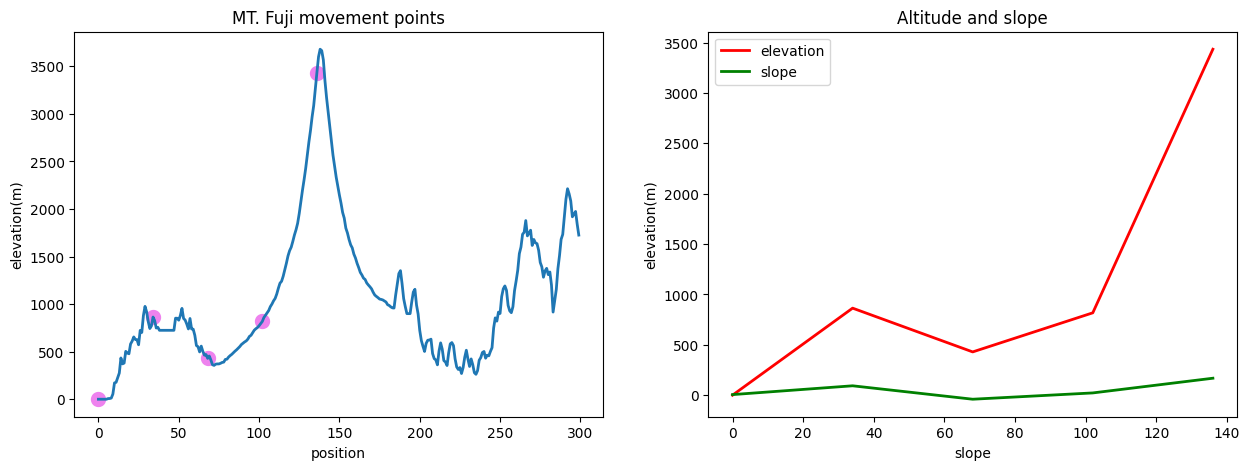

In [38]:

positions_array = descend_mountain(136,alpha)

figure = plt.figure(figsize=(15,5))
fig1 = figure.add_subplot(1,2,1)

fig1.set_title("MT. Fuji movement points")
fig1.set_xlabel("position")
fig1.set_ylabel("elevation(m)")
fig1.plot(fuji[:,0],fuji[:,3], linewidth=2)
fig1.scatter(positions_array,[fuji[position_2, 3] for position_2 in positions_array],c="violet",linewidth=5)# c is a short word of color

fig2 = figure.add_subplot(1,2,2)

fig2.set_title("Altitude and slope")
fig2.set_xlabel("slope")
fig2.set_ylabel("elevation(m)")
fig2.plot(positions_array,[fuji[position_2, 3] for position_2 in positions_array],color="red", label="elevation", linewidth=2)
fig2.plot(positions_array,[calc_slope(position_2, fuji) for position_2 in positions_array], c="green", label="slope", linewidth=2) 
fig2.legend()
plt.show()
     

<h2>6. Visualization of the descent process </h2>

<Figure size 1500x500 with 0 Axes>

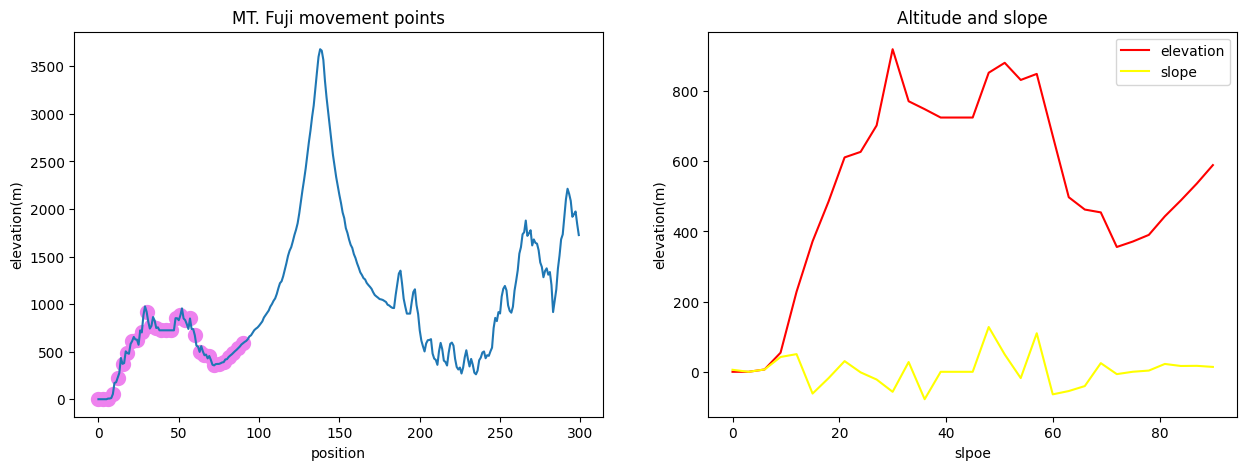

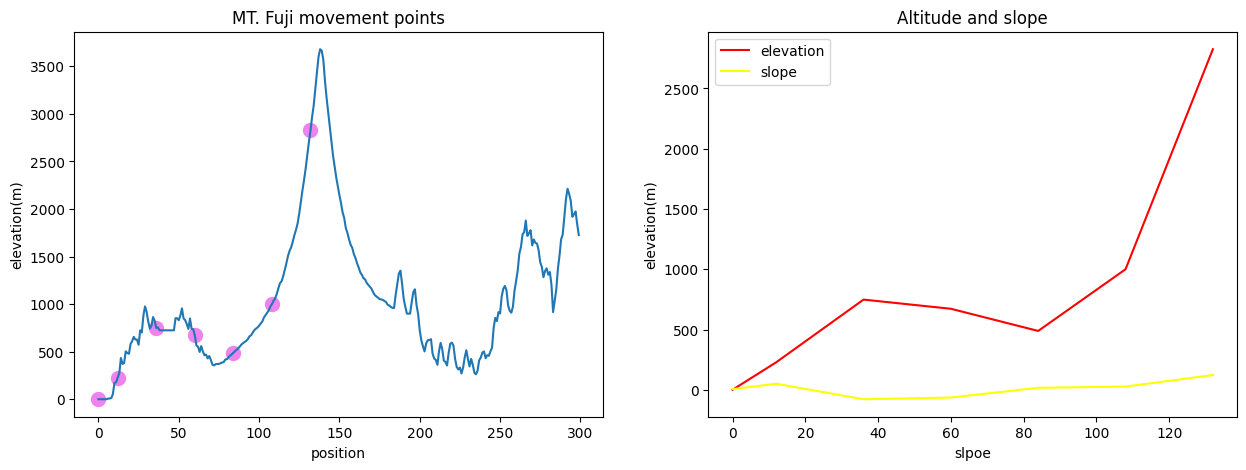

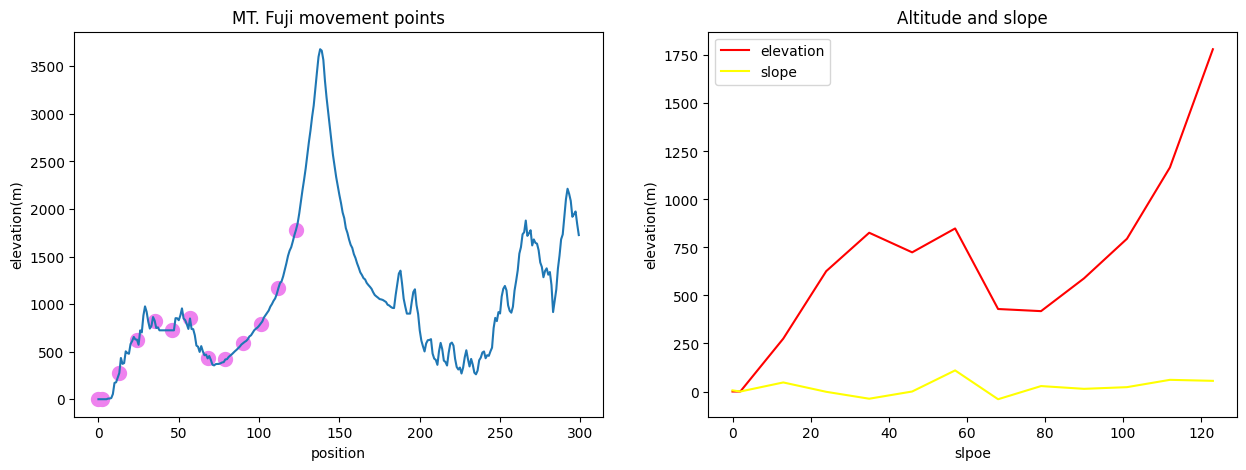

In [39]:
def display_graph_on_given_points(points):
    
    figure = plt.figure(figsize=(15,5))
    alpha_3 = 0.2
    for point_5 in range(points.size):
        
        positions_array_1 = descend_mountain(points[point_5],alpha_3)
        figure = plt.figure(figsize=(15,5))
        
        fig1 = figure.add_subplot(1,2,1)
        
        fig1.set_title("MT. Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0], fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="violet", linewidth=5)
        
        #make a line graph of the altitude and slope for each iteration
        
        fig2 = figure.add_subplot(1,2,2)
        
        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slpoe")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="red",label="elevation")
        fig2.plot(positions_array_1,[calc_slope(position_2, fuji) for position_2 in positions_array_1],c="yellow",label="slope")
        fig2.legend()
        plt.show()
        
points = np.array([90,132,123])
display_graph_on_given_points(points)


<h2>7. Visualization of the descent process for each initial value </h2>

<Figure size 1500x500 with 0 Axes>

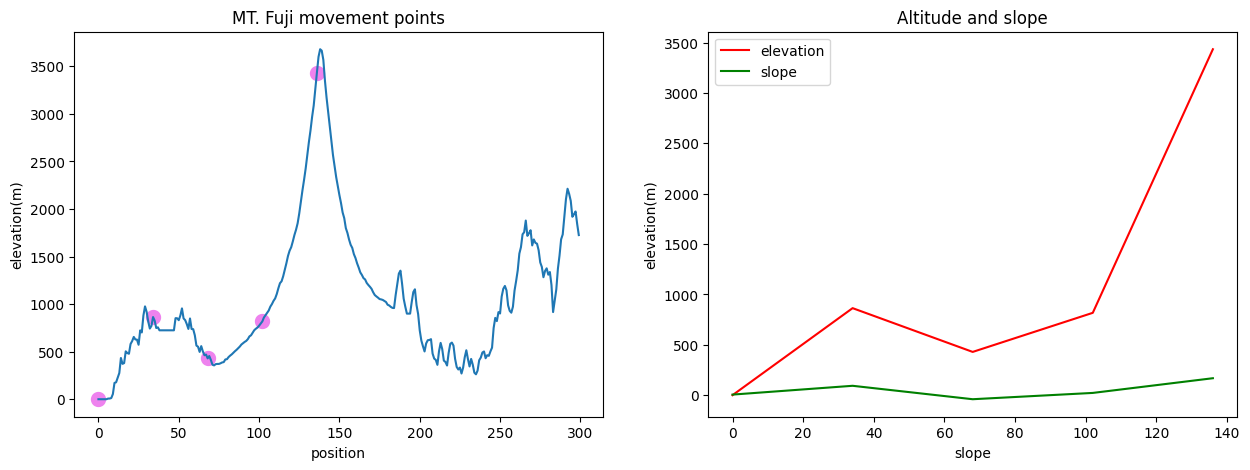

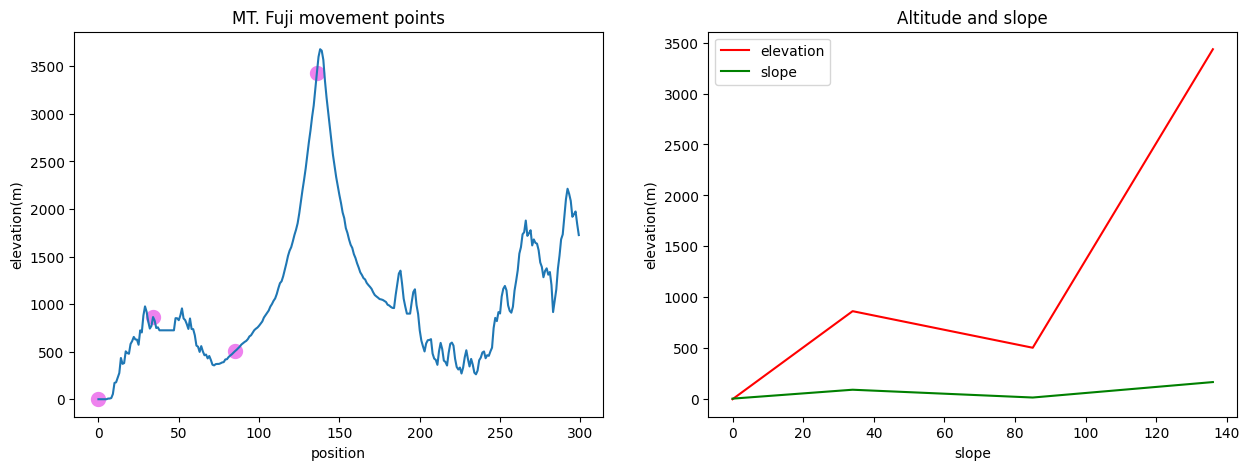

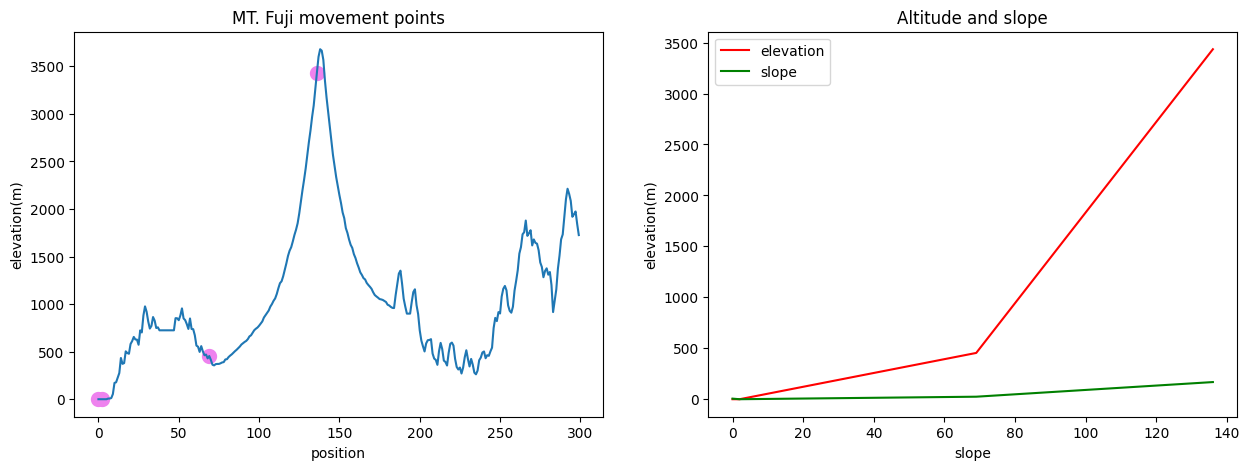

In [40]:
def display_graph_on_given_alpha_points(alphas):
    figure = plt.figure(figsize=(15,5))
    for point_6 in range(alphas.size):
        
        positions_array_1 = descend_mountain(136,alphas[point_6])
        figure = plt.figure(figsize=(15,5))
        fig1 =figure.add_subplot(1,2,1)
        
        fig1.set_title("MT. Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0],fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="violet", linewidth=5)
        
        # Make a line graph of the altitude and for each iteration
        
        fig2 = figure.add_subplot(1,2,2)
        
        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="red",label="elevation")
        fig2.plot(positions_array_1,[calc_slope(position_2, fuji) for position_2 in positions_array_1],c="green",label="slope")
        fig2.legend()
        plt.show()
        
alphas_1 = np.array([0.2,0.3,0.4])
display_graph_on_given_alpha_points(alphas_1)